# Classifying chords as consonant or dissonant through a TensorFlow neural network-based model

In this experiment, I played 16 chords using a base piano preset on FL Studio and exported each as an OGG file. My model should, when given the proper features, differentiate a consonant chord from a dissonant chord using a logistic regression curve.

This is an important because it shows us what features of an audio file distinguish it as being "consonant" or "dissonant." We humans have the power of music theory knowledge on our side, but can a computer do the same? With the help of support vector machines, 

# Importing all required libraries
I am using *librosa* to process the audio.  workflow:  stream audio files into notebook,  associate them with their respective labels,  generate features,  train binary classification model,  predict and evaluate!

In [1]:
import librosa as lr
from librosa import display
import numpy as np
import pandas as pd
import sklearn as sl
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import matplotlib as plt
import statistics as stat
from sklearn.linear_model import LogisticRegression

In [2]:
data = np.ndarray((16, 40, 532))
soundfiles = []
X = []
y = []
sr = 0
for i in range(8):
    consonant, sr = lr.load(('audio/consonant' + str(i+1) + '.ogg'))
    dissonant, sr = lr.load(('audio/dissonant' + str(i+1) + '.ogg'))
    soundfiles.append(consonant)
    soundfiles.append(dissonant)
    consonant = np.append(np.asarray(consonant, dtype=float), [0, 0, 0, 0, 0, 0])
    dissonant = np.append(np.asarray(dissonant, dtype=float), [0, 0, 0, 0, 0, 0])
    consonant = consonant.reshape(40, 509)
    dissonant = dissonant.reshape(40, 509)
    consonant /= np.amax(consonant)
    dissonant /= np.amax(dissonant)
    
    zeroCrossings = lr.zero_crossings(np.asarray(consonant, dtype = float))
    dissonantCrossings = lr.zero_crossings(np.asarray(dissonant, dtype = float))
    
    spectral_centroid = lr.feature.spectral_centroid(consonant.reshape(20360), sr=sr)[0]
    dissonant_centroid = lr.feature.spectral_centroid(dissonant.reshape(20360), sr = sr)[0]
    
    spectral_rolloff = lr.feature.spectral_rolloff(consonant.reshape(20360), sr=sr)[0]
    dissonant_rolloff = lr.feature.spectral_rolloff(dissonant.reshape(20360), sr = sr)[0]
    
    mfccs = lr.feature.mfcc(consonant.reshape(20360), sr=sr)
    dissonant_mfccs = lr.feature.mfcc(dissonant.reshape(20360), sr=sr)
    
    for j in range(40):
        consonant_features = np.ndarray((23))
        consonant_features[0] = sum(zeroCrossings[j])
        consonant_features[1] = spectral_centroid[j]
        consonant_features[2] = spectral_rolloff[j]
        for k in range(20):
            consonant_features[3+k] = mfccs[k][j]
        
        dissonant_features = np.ndarray((23))
        dissonant_features[0] = sum(dissonantCrossings[j])
        dissonant_features[1] = dissonant_centroid[j]
        dissonant_features[2] = dissonant_rolloff[j]
        for k in range(20):
            dissonant_features[3+k] = dissonant_mfccs[k][j]
        
        data[2*i][j][509:532] = consonant_features
        data[2*i+1][j][509:532] = dissonant_features
        for k in range(509):
            data[2*i][j][k] = consonant[j][k]
            data[2*i+1][j][k] = dissonant[j][k]
    
    y.append(0)
    y.append(1)
soundfiles = np.asarray(soundfiles)

In [3]:
y = np.asarray(y, dtype=int)
y = y.reshape(len(y))
# X = pd.DataFrame(data)
# y = pd.DataFrame(y)
# X.index.name = 'sound file'


# Making sure files imported successfully

Here I use *librosa*'s display module to display a spectrogram of a wave. This is the first chord in the list

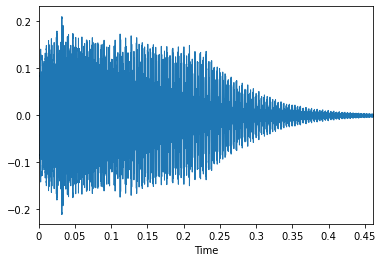

In [4]:
import IPython.display as ipd
lr.display.waveplot(soundfiles[0], sr=44100)

In [5]:
ipd.Audio(soundfiles[0], rate = sr)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state = 42)

In [7]:
from tensorflow.keras.layers import Flatten, Dense, Dropout
myNet = Sequential()
myNet.add(Flatten(input_shape=(40, 532)))
myNet.add(Dense(2, activation = 'softmax'))
myNet.add(Dense(1, activation = 'sigmoid'))
# myNet.add(Dense(1, activation = 'sigmoid'))
myNet.compile(loss='binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
myNet.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 21280)             0         
_________________________________________________________________
dense (Dense)                (None, 2)                 42562     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 42,565
Trainable params: 42,565
Non-trainable params: 0
_________________________________________________________________


In [8]:
from tensorflow.keras.metrics import MeanSquaredError
y_train = y_train.reshape(len(y_train))
y_test = y_test.reshape(len(y_test))
myNet.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

y_pred = myNet.predict(X_test)


Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 0.7439 - accuracy: 0.5000 - val_loss: 0.7436 - val_accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 44ms/step - loss: 0.7436 - accuracy: 0.5000 - val_loss: 0.7433 - val_accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 0.7433 - accuracy: 0.5000 - val_loss: 0.7430 - val_accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 44ms/step - loss: 0.7430 - accuracy: 0.5000 - val_loss: 0.7427 - val_accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 43ms/step - loss: 0.7427 - accuracy: 0.5000 - val_loss: 0.7424 - val_accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 44ms/step - loss: 0.7424 - accuracy: 0.5000 - val_loss: 0.7421 - val_accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 41ms/step - loss: 0.7421 - accuracy: 0.5000 - val_loss: 0.7418 - val_accuracy: 0.5000
Epoch 8/50
1/1 [=============

The result 0 means the chord is consonant. The result 1 means the chord is dissonant. I counted a chord as consonant or dissonant based on whether it followed basic major, minor, diminished, or augmented classifications set forth by the basic principles of music theory.

# Testing with another file
Here, I provide my model with a wildcard chord just to test if it can predict another outcome.

In [9]:
final_data = np.ndarray((40, 532))

final_audio, sr = lr.load('audio/mltestold.ogg')

final = np.append(np.asarray(final_audio, dtype=float), [0, 0, 0, 0, 0, 0])
final = consonant.reshape(40, 509)
final /= np.amax(final)

zeroCrossings = lr.zero_crossings(np.asarray(final, dtype = float))

spectral_centroid = lr.feature.spectral_centroid(final.reshape(20360), sr=sr)[0]

spectral_rolloff = lr.feature.spectral_rolloff(final.reshape(20360), sr=sr)[0]

mfccs = lr.feature.mfcc(final.reshape(20360), sr=sr)

for j in range(40):
    final_features = np.ndarray((23))
    final_features[0] = sum(zeroCrossings[j])
    final_features[1] = spectral_centroid[j]
    final_features[2] = spectral_rolloff[j]
    for k in range(20):
        final_features[3+k] = mfccs[k][j]

    final_data[j][509:532] = consonant_features
    for k in range(509):
        final_data[j][k] = final[j][k]
final_data = final_data.reshape(1, 40, 532)


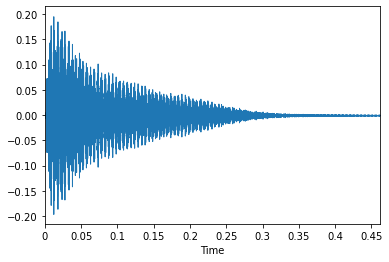

In [10]:
lr.display.waveplot(final_audio[0:20354], sr=44100)

In [11]:
final_test = myNet.predict(final_data)
final_test

array([[0.63291717]], dtype=float32)

In [12]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(final_test, [[0]])
m.result().numpy()

0.0

The result, which is very close to 0, means the model recognized the chord as consonant, which we can confirm by listening to it below:

In [13]:
ipd.Audio(final_audio[0:20354], rate = sr)

The above chord has a minor quality, thus classifying it as consonant according to our criteria. The model has correctly predicted its quality! Now, we can test this with our SVM.

In [14]:
from sklearn.svm import SVC

musicSVM = SVC(kernel='linear')

In [15]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2])

musicSVM.fit(X_train, y_train)

SVC(kernel='linear')

In [16]:
y_pred = musicSVM.predict(X_test)
print(y_pred, y_test)

[0 1 1 0] [0 1 1 0]


In [17]:
final_data = final_data.reshape(final_data.shape[0], final_data.shape[1]*final_data.shape[2])
final_test = musicSVM.predict(final_data)
final_test

array([1])

In [18]:
m = tf.keras.metrics.BinaryAccuracy()
m.update_state(final_test, [[0]])
m.result().numpy()

0.0